<strong>Дано числовое уравнение, т.е. уравнение в одной вещественной неизвестной.
    
A. Преобразовать уравнение к виду, пригодному для применения принципа
сжимающих операторов.

B. Методом простых итераций найти приближенное решение с точностью $10^{-5}$, используя априорную и апостериорную оценки числа итераций.</strong>

$x + \frac{x}{x^{2} + 1} + \sin{\left (\frac{x}{2} \right )} = 5$

<i>A. Преобразуем уравнение к виду, пригодному для применения принципа сжимающих
операторов.</i>

Обозначим $\varphi(x) = x + \frac{x}{x^{2} + 1} + \sin{\left (\frac{x}{2} \right )} - 5$, причем $\varphi(x) = 0$. 

Вычислим $\varphi^{'}(x)$:

In [82]:
import sympy as sp
from IPython.display import display

sp.init_printing(use_latex='mathjax')

x = sp.Symbol('x')
varphi = (x + sp.sin(x/2) + x/(1 + x**2) - 5) 

diffed_varphi = sp.diff(varphi, x)
display(diffed_varphi) 

                 ⎛x⎞             
        2     cos⎜─⎟             
     2⋅x         ⎝2⎠         1   
- ───────── + ────── + 1 + ──────
          2     2           2    
  ⎛ 2    ⎞                 x  + 1
  ⎝x  + 1⎠                       

Поскольку 
$$- \frac{1}{2} \leq \frac{1}{2} \cos{\left (\frac{x}{2} \right )} \leq \frac{1}{2},$$
$$0 < \frac{1}{x^{2} + 1} \leq 1,$$
$$- \frac{1}{2} < - \frac{2x^{2}}{(x^{2} + 1)^{2}} \leq 0,$$
то получаем оценку
$$0 < \nu \leq \varphi^{'}(x) \leq \mu,$$
$$ \nu = 0, \mu = \frac{5}{2}$$


$$ \nu = \frac{1}{2}, \mu = \frac{5}{2}$$

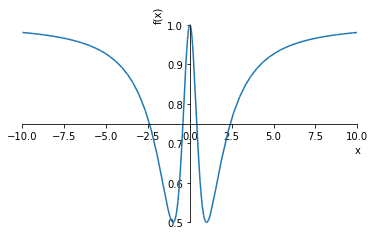

In [55]:
research = (x**4 + 1)/(x**2 + 1)**2
display(sp.plot(research))

Преобразуем уравнение $\varphi(x) = 0$ к виду $x - \frac{1}{\mu}\varphi(x) = x$:
$$x - \frac{2}{5}(x + \frac{x}{x^{2} + 1} + \sin{\left (\frac{x}{2} \right )} - 5) = x$$

$\alpha = 1 - \frac{\nu}{\mu}$

In [78]:
# good one
# nu = sp.Rational(-1, 2)
nu = sp.Rational(1, 99999)
mu = sp.Rational(5, 2)
epsilon = 10**(-5)

alpha = 1 - nu/mu

display(alpha)

499993
──────
499995

Таким образом, нашли $\alpha$.

$$x_n = x_{n - 1} - \frac{2}{5}(x_{n - 1} + \frac{x_{n - 1}}{x_{n - 1}^{2} + 1} + \sin{\left (\frac{x_{n - 1}}{2} \right)} - 5)$$

Выберем произвольным образом начальное приближение, например $x_0 = 6$, и вычисляем
первую итерацию $x_1$:

In [ ]:
import math

def dist(x1, x0):
    return math.fabs(x1 - x0)

def is_enough(alp, x1, x0, eps): 
    return (alp/(1 - alp))*dist(x1, x0) <= eps

def apriori_weight(alp, eps, x0, x1):
    return (math.log(eps*(1 - alp)/dist(x0, x1), alp) + 1)

In [80]:
x_0 = 6.
x_1 = varphi.subs(x, x_0)
apriori = apriori_weight(alpha, epsilon, x_0, x_1)
display(apriori)

6372173.431033353

In [ ]:
my_x = x_0
i = 0
while True:
    i += 1
    my_x_prev = my_x
    my_x = varphi.subs(x, my_x_prev)
    if is_enough(alpha, my_x, my_x_prev, epsilon):
        break
        
display(i)
display(my_x)